In [16]:
# Importing librarys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [17]:
# Load the dataset
df = pd.read_csv('exam-scores.csv', delimiter=",")
print(f'Shape of the data : {df.shape}')
df.head()

Shape of the data : (65, 7)


,f1,f2,f3,f4,f5,f6,target
0,M01,A,20,N,N,Y,+
1,M01,A,20,?,?,?,+
2,M01,A,30,Y,Y,Y,+
3,M01,A,50,N,Y,Y,+
4,M01,A,55,Y,Y,N,+


In [18]:
# Iterate over all columns of the DataFrame
for col in df.columns:
    # Get the count of different items in the column
    item_counts = df[col].value_counts()
    
    # Print the count of each item
    print(f"Column '{col}':\n{item_counts}\n")

Column 'f1':
M02    36
M01    29
Name: f1, dtype: int64

Column 'f2':
A    17
B    16
C    16
D    16
Name: f2, dtype: int64

Column 'f3':
60    12
45    10
25     8
20     7
55     6
35     6
40     6
30     4
50     4
15     2
Name: f3, dtype: int64

Column 'f4':
Y    26
N    25
?    14
Name: f4, dtype: int64

Column 'f5':
Y    28
N    23
?    14
Name: f5, dtype: int64

Column 'f6':
Y    27
N    24
?    14
Name: f6, dtype: int64

Column 'target':
+    57
-     8
Name: target, dtype: int64



In [19]:
# Pre-processing

# Drop rows with null values
df = df.dropna()

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['f1','f2','f4','f5','f6','target']
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])

''' now in 'target' the - is represent with 1 and the + is represent with 0 
so we need to replace 0 and 1 to make the logic right '''
# Replace 0 and 1 in target
df['target'] = df['target'].replace({0:1, 1:0})

# Calculate the Z-scores of each column and Remove rows with outliers
z_scores = stats.zscore(df)
df = df[(z_scores < 3).all(axis=1)]

# Display the data
print(f'Shape of the data : {df.shape}')
df.head()

Shape of the data : (65, 7)


,f1,f2,f3,f4,f5,f6,target
0,0,0,20,1,1,2,1
1,0,0,20,0,0,0,1
2,0,0,30,2,2,2,1
3,0,0,50,1,2,2,1
4,0,0,55,2,2,1,1


In [20]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print the standardized training data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print('--------------')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (45, 6)
y_train shape: (45,)
--------------
x_test shape: (20, 6)
y_test shape: (20,)


In [23]:
# Initialize a decision tree classifier object with default parameters
dt = DecisionTreeClassifier()

# Fit to the train data
dt.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(x_test)

In [24]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7
Precision: 0.875
Recall: 0.7777777777777778
F1 score: 0.823529411764706


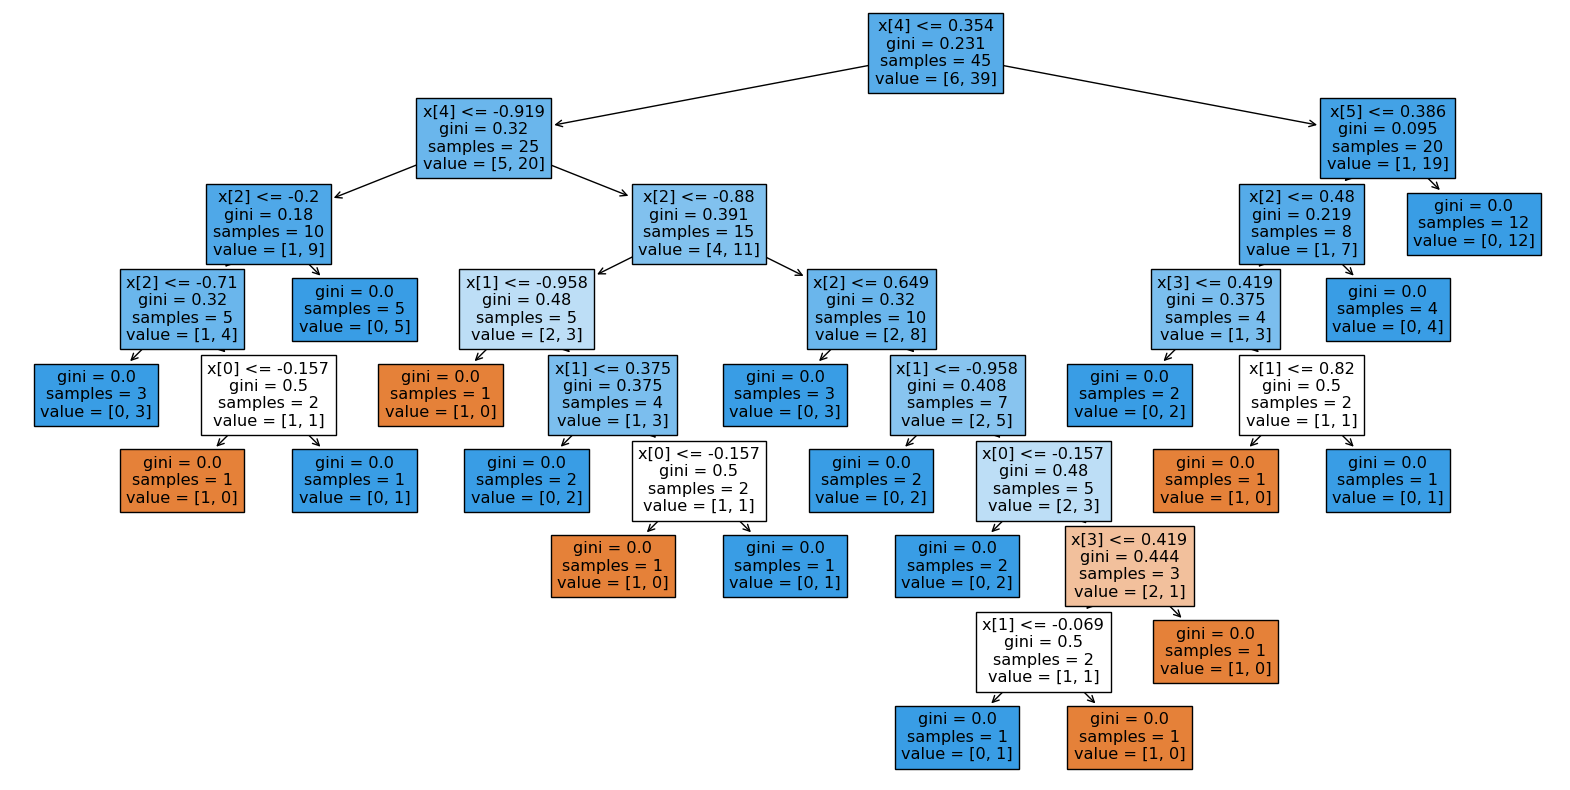

In [25]:
# Plot the Tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()

In [33]:
# Create a decision tree classifier object with specified hyperparameters
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

# Fit the classifier to the training data
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

# Evaluate the performance of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7
Precision: 0.875
Recall: 0.7777777777777778
F1 score: 0.823529411764706


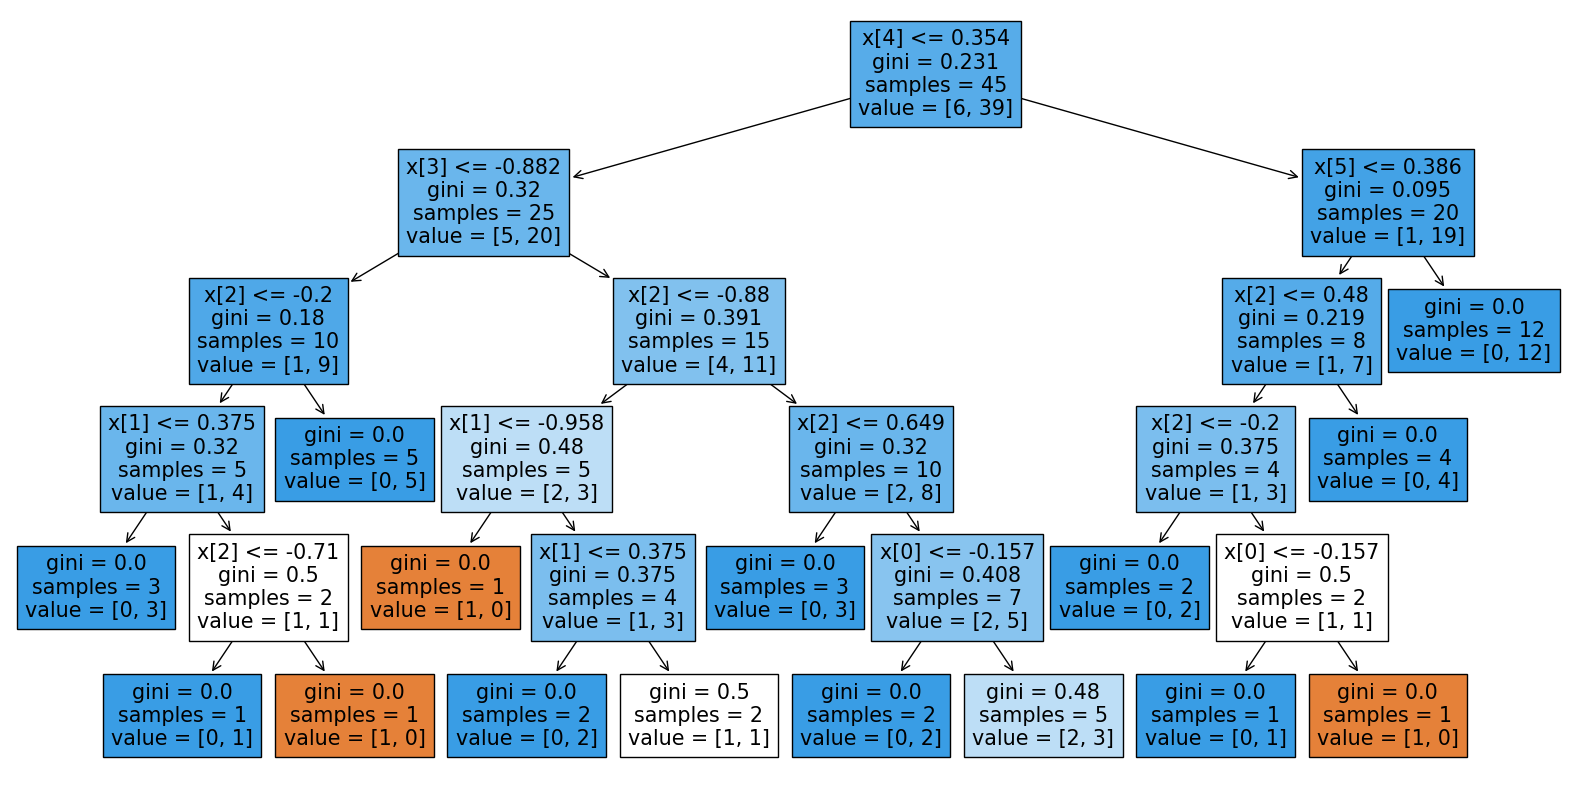

In [34]:
# Plot the Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True)
plt.show()

In [39]:
# Define the decision tree classifier
decision_tree_GS = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,5,7,10,13,15,17,19,20],
    'criterion': ['gini', 'entropy']
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=decision_tree_GS,
    param_grid=param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=5
)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20}


In [41]:
# Create a decision tree classifier object with the best hyperparameters
decision_tree_best = DecisionTreeClassifier(max_depth=2, min_samples_split=20, criterion='gini')

# Fit the classifier to the full training data
decision_tree_best.fit(x_train, y_train)
y_pred = decision_tree_best.predict(x_test)

# Evaluate the performance of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9
Precision: 0.9
Recall: 1.0
F1 score: 0.9473684210526316
